# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Load the dataset


In [ ]:
df = pd.read_csv('Traffic_Jams.csv')

# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               6324 non-null   object
 1   Date               6324 non-null   int64 
 2   Day of the week    6324 non-null   object
 3   CarCount           6324 non-null   int64 
 4   BikeCount          6324 non-null   int64 
 5   BusCount           6324 non-null   int64 
 6   TruckCount         6324 non-null   int64 
 7   Total              6324 non-null   int64 
 8   Traffic Situation  6324 non-null   object
dtypes: int64(6), object(3)
memory usage: 444.8+ KB


In [ ]:
df.sample(5)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
3471,3:45:00 AM,15,Sunday,19,3,1,27,50,normal
222,7:30:00 AM,12,Thursday,140,14,12,12,178,heavy
3517,3:15:00 PM,15,Sunday,18,27,19,6,70,normal
3687,9:45:00 AM,17,Tuesday,92,19,15,7,133,normal
5492,5:00:00 AM,5,Sunday,92,23,3,19,137,normal


In [ ]:
df['Traffic Situation'].unique()
# We have 4 Catogries in our target

array(['normal', 'low', 'heavy', 'high'], dtype=object)

In [ ]:
df.select_dtypes(include='object').describe().T
# As shown below more than half of days in the dataset traffic is normal
# Day of the week and time intervals does not clearfiy anything due to small frequents in compare with dataset values

,count,unique,top,freq
Time,6324,96,9:30:00 PM,77
Day of the week,6324,7,Thursday,1020
Traffic Situation,6324,4,normal,3858


In [ ]:
df['Traffic Situation'].value_counts()
# We can see that is normal but how much cars are there in day that has normal traffic jam?

,count
Traffic Situation,
normal,3858
heavy,1137
low,834
high,495


In [ ]:
df.select_dtypes(exclude='object').describe().T
# Needs Standariztion

,count,mean,std,min,25%,50%,75%,max
Date,6324.0,16.043327,8.956907,1.0,8.0,16.0,24.00,31.0
CarCount,6324.0,64.355629,44.307088,5.0,18.0,61.0,101.25,180.0
BikeCount,6324.0,12.013283,11.363955,0.0,3.0,9.0,19.00,70.0
BusCount,6324.0,12.557875,12.319831,0.0,1.0,10.0,20.00,50.0
TruckCount,6324.0,18.658128,10.724822,0.0,10.0,18.0,27.00,60.0
Total,6324.0,107.584915,55.850784,21.0,53.0,103.0,151.00,279.0


In [ ]:
corr = df.corr(numeric_only=True)
corr

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
Date,1.000000,-0.010507,-0.001985,-0.006166,0.021137,-0.006041
CarCount,-0.010507,1.000000,0.705941,0.664491,-0.583984,0.971386
BikeCount,-0.001985,0.705941,1.000000,0.581289,-0.585670,0.779261
BusCount,-0.006166,0.664491,0.581289,1.000000,-0.533847,0.763496
TruckCount,0.021137,-0.583984,-0.585670,-0.533847,1.000000,-0.508179
Total,-0.006041,0.971386,0.779261,0.763496,-0.508179,1.000000


# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

In [ ]:
df.isna().sum()
# No null values Alhamdullah

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
scalar = StandardScaler()

for i in df.select_dtypes(exclude='object').columns:
  df[i] = scalar.fit_transform(df[[i]])

In [ ]:
le = LabelEncoder()

for i in ['Time', 'Day of the week', 'Traffic Situation']:
  df[i] = le.fit_transform(df[i])

# I used labelencoder cause it has a fixed sequence for Time and Day of the week
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,16,-0.674765,5,-1.159175,-0.881214,-0.857050,0.498124,-1.192287,3
1,18,-0.674765,5,-1.136604,-0.969218,-0.938226,1.617112,-0.995318,3
2,20,-0.674765,5,-1.226890,-0.881214,-0.857050,1.244116,-1.102756,3
3,22,-0.674765,5,-1.226890,-0.881214,-0.857050,1.617112,-1.031131,3
4,24,-0.674765,5,-1.204319,-0.881214,-0.938226,1.430614,-1.066943,3


In [ ]:
encoder = OneHotEncoder()
# df['Traffic Situation'] = encoder.fit_transform(df[['Traffic Situation']])

# I tried to encode the target using onehot since it is not in sequence but it didn't work, so i'm going to encode it using labelencoder

# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

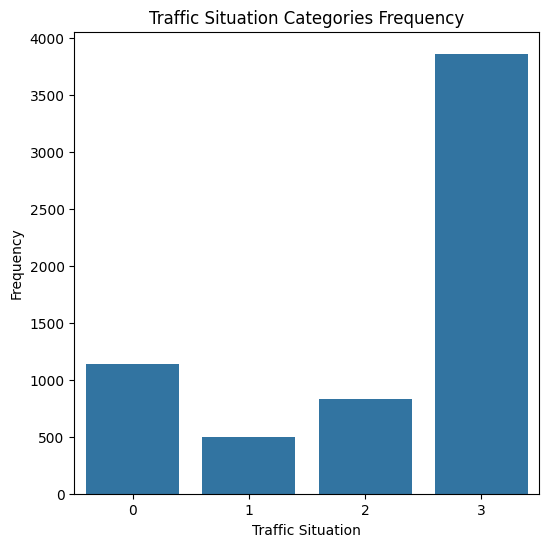

In [ ]:
plt.figure(figsize=(6, 6))
plt.title('Traffic Situation Categories Frequency')
plt.ylabel('Frequency')
sns.countplot(df, x='Traffic Situation')
plt.show()

# as we see above in value_counts for Traffic Situation it appear that normal traffic jam if the most frequent in our dataset

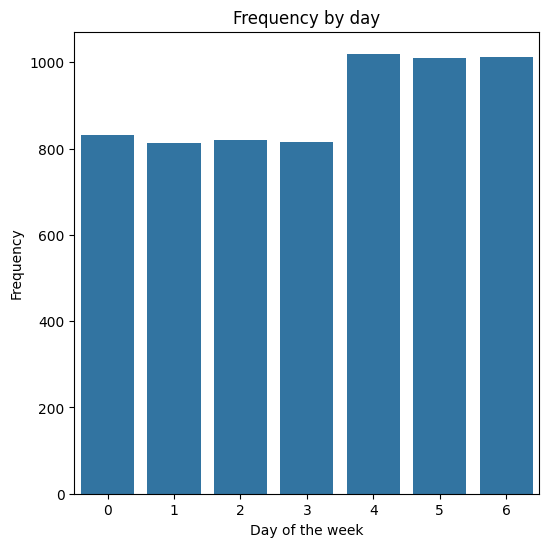

In [ ]:
plt.figure(figsize=(6, 6))
plt.title('Frequency by day')
plt.ylabel('Frequency')
sns.countplot(df, x='Day of the week')
plt.show()

# We can see there is no much diffrence between each day since it is data over one month

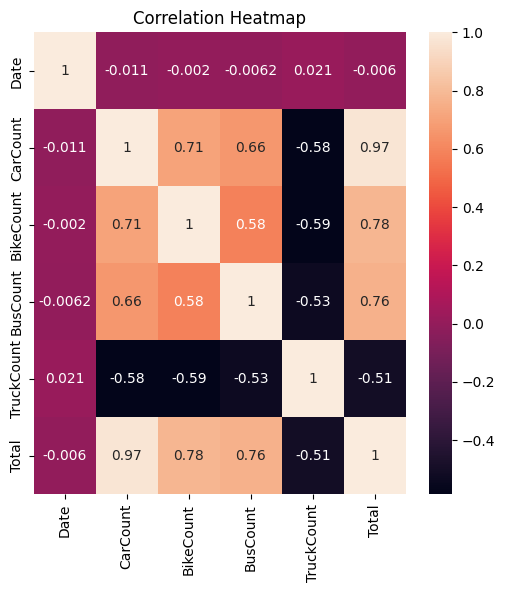

In [ ]:
plt.figure(figsize=(6, 6))
plt.title('Correlation Heatmap')
sns.heatmap(corr, annot=True)
plt.show()

# as it seems we have strong correlation between CarCount and Total, this tell us that most of the road has cars not bikes or buses or trucks
# Trucks dont have correlation with other features due to its counts
# rest of relationships can vary even if it has strong correlation, if we see the correlation between CarCount and BikeCount we would say it is strong but it is not nessecerly true

# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

In [ ]:
X = df.drop('Traffic Situation', axis=1)
y = df['Traffic Situation']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Classifiers

## Bagging
Chose the bagging model to go with and initialize and train a the model.

In [ ]:
bagging = BaggingClassifier(n_estimators=50, random_state=42)

bagging.fit(X_train, y_train)

bagging_pred = bagging.predict(X_test)

### Evaluate the model performance

In [ ]:
accuracy_score(y_test, bagging_pred)

0.9011857707509882

## Boosting
Chose the Boosting model to go with and initialize and train a the model.

In [ ]:
boosting = GradientBoostingClassifier() # trusting defualte parameters

boosting.fit(X_train, y_train)

boosting_pred = boosting.predict(X_test)

### Evaluate the model performance

In [ ]:
accuracy_score(y_test, boosting_pred)

0.9185770750988143

## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

In [ ]:
base_models = [
    ('bagging', bagging),
    ('boosting', boosting)
]

### Define meta-learner (LogisticRegression)

In [ ]:
meta_model = LogisticRegression()

### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [ ]:
stacking = StackingClassifier(base_models, meta_model)

stacking.fit(X_train, y_train)

stacking_pred = stacking.predict(X_test)

### Evaluate the model performance

In [ ]:
accuracy_score(y_test, stacking_pred) # Since we combined more than one model it is sure that this model is going to be the winner!

0.9525691699604744

# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?


# Answer here:

* **Feature Selection and Engineering**

 - I have limited features to select from, so I didn't exclude any feature, all features are important but the most important is total, to measure traffic jams

* **Model Selection**

 - ensemble models are more effecient than single models because they combine the best of single models in one model making it much accurate to predict

* **Model Evaluation**

 - I used accuracy_score metric to see the accurate precent of each model, I could use confusion_matrix as will but it would be a burden to figure which model is best, since accuracy_scores are close to eachother the differnet in confusion_matrix won't be much
 - Our winner is Stacking which has the most accurate score by 95%